**Dataset Schema**

- ID - Unique identifier for the record.

- Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

- Date - Date when the incident occurred. this is sometimes a best estimate.

- Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

- IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

- Primary Type - The primary description of the IUCR code.

- Description - The secondary description of the IUCR code, a subcategory of the primary description.

- Location Description - Description of the location where the incident occurred.

- Arrest - Indicates whether an arrest was made.

- Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

- Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

- District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

- Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

- Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

- FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

- X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

-  Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

- Year - Year the incident occurred.

- Updated On - Date and time the record was last updated.

- Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.


### Data Injection

In [2]:
# Import the necessary libraries

#libraries for data wrangling
import pandas as pd
import numpy as np

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for time
from datetime import datetime, timedelta

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set up views
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("C:/Users/XCEPTIONALGLOBAL/Desktop/my_task-1/Large File/Crimes_-_2001_to_Present.csv")
df.tail()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7784659,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.0,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.0,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.0,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"
7784663,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,1513,15.0,29.0,25.0,15,1136773.0,1899652.0,2022,01/03/2023 03:46:28 PM,41.880802,-87.773246,"(41.880802263, -87.773245737)"


### Preliminary Data Analysis (PDA)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [58]:
# Data dimensions
print('Features Count:', len(df.columns))
print("Dataset shape:", df.shape)

Features Count: 22
Dataset shape: (7784664, 22)


In [59]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [60]:
# Columns in the dataset
print('Columns in the dataset:', df.columns)

Columns in the dataset: Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')


In [61]:

df.describe(include='all')

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,7.784664e+06,7784660,7784664,7784664,7784664,7784664,7784664,7774283,7784664,7784664,7.784664e+06,7.784617e+06,7.169816e+06,7.171188e+06,7784664,7.697816e+06,7.697816e+06,7.784664e+06,7784664,7.697816e+06,7.697816e+06,7697816
unique,NaN,7784121,3207478,62845,404,36,544,215,2,2,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,5561,NaN,NaN,890516
top,NaN,HZ140230,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,NaN,NaN,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,6,304,16486,631091,1642148,913484,2026828,5749900,6708370,NaN,NaN,NaN,NaN,1642148,NaN,NaN,NaN,2787942,NaN,NaN,14272
mean,7.026439e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.185918e+03,1.129466e+01,2.275420e+01,3.748472e+01,NaN,1.164601e+06,1.885783e+06,2.009944e+03,NaN,4.184218e+01,-8.767149e+01,NaN
std,3.502657e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.031335e+02,6.952422e+00,1.385106e+01,2.154115e+01,NaN,1.684658e+04,3.227531e+04,6.260628e+00,NaN,8.879598e-02,6.108257e-02,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,3.792574e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,NaN,1.152976e+06,1.859073e+06,2.005000e+03,NaN,4.176871e+01,-8.771367e+01,NaN
50%,7.029327e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,NaN,1.166110e+06,1.890730e+06,2.009000e+03,NaN,4.185591e+01,-8.766584e+01,NaN
75%,1.013113e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,NaN,1.176372e+06,1.909273e+06,2.015000e+03,NaN,4.190677e+01,-8.762819e+01,NaN


In [62]:
# Mising Values
print('Mising Values:\n', df.isna().sum())

Mising Values:
 ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64


In [63]:
# Duplicate count
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [64]:
df.nunique()

ID                      7784664
Case Number             7784121
Date                    3207478
Block                     62845
IUCR                        404
Primary Type                 36
Description                 544
Location Description        215
Arrest                        2
Domestic                      2
Beat                        304
District                     24
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              79017
Y Coordinate             130184
Year                         23
Updated On                 5561
Latitude                 889260
Longitude                888670
Location                 890516
dtype: int64

#### Cleaning

In [ ]:
# Drop missing year
df['Year'] = df['Year'].dropna()

# Fill missing location
df['Location Description'] = df['Location Description'].fillna('UNKNOWN')


print(df.isna().sum())

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64


<Axes: xlabel='Year'>

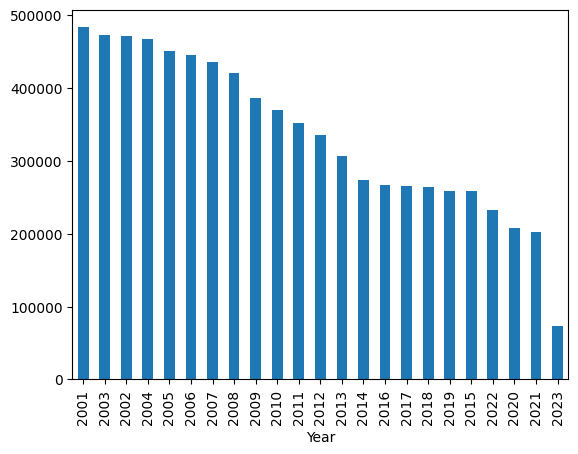

In [39]:
df['Year'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
# Drop missing coordinate for X and Y coordinates
df= df.dropna(subset=['X Coordinate', 'Y Coordinate'])


print(df.isna().sum())

ID                           0
Case Number                  3
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    605594
Community Area          604274
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64


In [32]:
# Covert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Time features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()

print("Time:\n", df['Date'])

Time:
 0         2015-09-05 13:30:00
1         2015-09-04 11:30:00
3         2015-09-05 12:45:00
4         2015-09-05 13:00:00
5         2015-09-05 10:55:00
                  ...        
7784659   2022-09-01 05:00:00
7784660   2022-07-08 00:00:00
7784661   2022-09-27 11:00:00
7784662   2022-09-03 10:25:00
7784663   2022-09-26 19:20:00
Name: Date, Length: 7697816, dtype: datetime64[ns]


### Descriptive Data Analysis (DDA)

Total Number of Years: 23
Crimes per year:
 Year
2001    482877
2002    471529
2003    472041
2004    467204
2005    449920
2006    445550
2007    435693
2008    420036
2009    386051
2010    370012
2011    351317
2012    335460
2013    306377
2014    273750
2015    257931
2016    267260
2017    264961
2018    263476
2019    259160
2020    208468
2021    202884
2022    233126
2023     72733
Name: count, dtype: int64
Year with highest crime: 2001 482877


Text(0, 0.5, 'Crime Count')

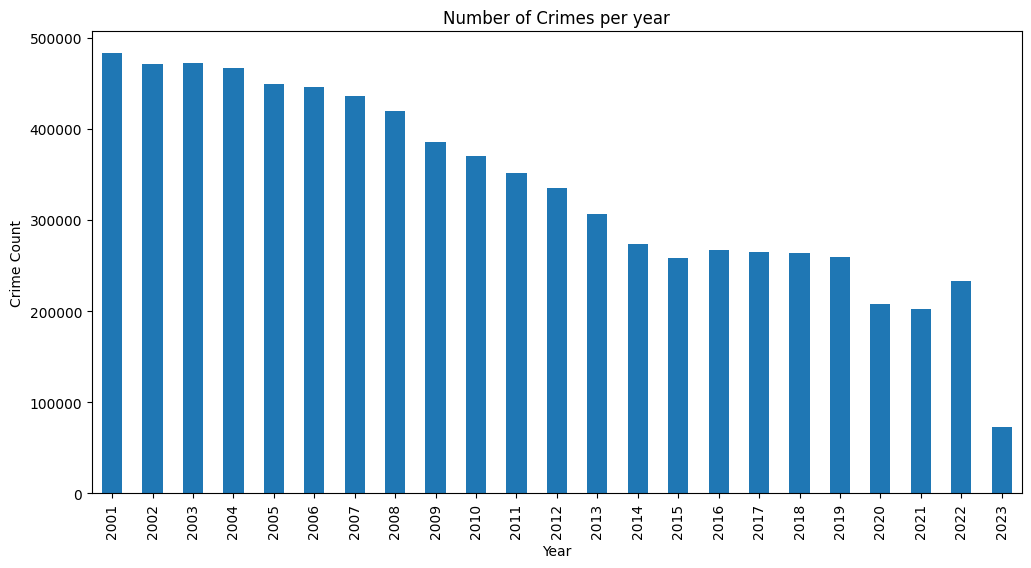

In [ ]:
print('Total Number of Years:', df['Year'].nunique())

# Crimes per year
crimes_per_year = df['Year'].value_counts().sort_index()
print("Crimes per year:\n", crimes_per_year)

max_year = crimes_per_year.idxmax()
max_count = crimes_per_year.max()

print("Year with highest crime:", max_year, max_count)


plt.figure(figsize=(12, 6))
crimes_per_year.plot(kind= 'bar')
plt.title("Number of Crimes per year")
plt.xlabel("Year")
plt.ylabel("Crime Count")

In [ ]:
# # Group by Crime Type
# arrest_rate = df.groupby('Primary Type')['Arrest']
# print(arrest_rate)


In [52]:
df['Primary Type'].nunique()

36

In [63]:
df['Primary Type'].value_counts()

Primary Type
THEFT                                1621058
BATTERY                              1416797
CRIMINAL DAMAGE                       882683
NARCOTICS                             735198
ASSAULT                               505112
OTHER OFFENSE                         479390
BURGLARY                              422718
MOTOR VEHICLE THEFT                   372060
DECEPTIVE PRACTICE                    326375
ROBBERY                               290847
CRIMINAL TRESPASS                     213269
WEAPONS VIOLATION                     105884
PROSTITUTION                           69172
PUBLIC PEACE VIOLATION                 52082
OFFENSE INVOLVING CHILDREN             51989
SEX OFFENSE                            28831
CRIM SEXUAL ASSAULT                    26144
INTERFERENCE WITH PUBLIC OFFICER       18320
LIQUOR LAW VIOLATION                   14760
GAMBLING                               14520
ARSON                                  13162
HOMICIDE                               125

<Axes: title={'center': 'Total Primary Type of Crime'}, xlabel='Primary Type', ylabel='Number of Crime '>

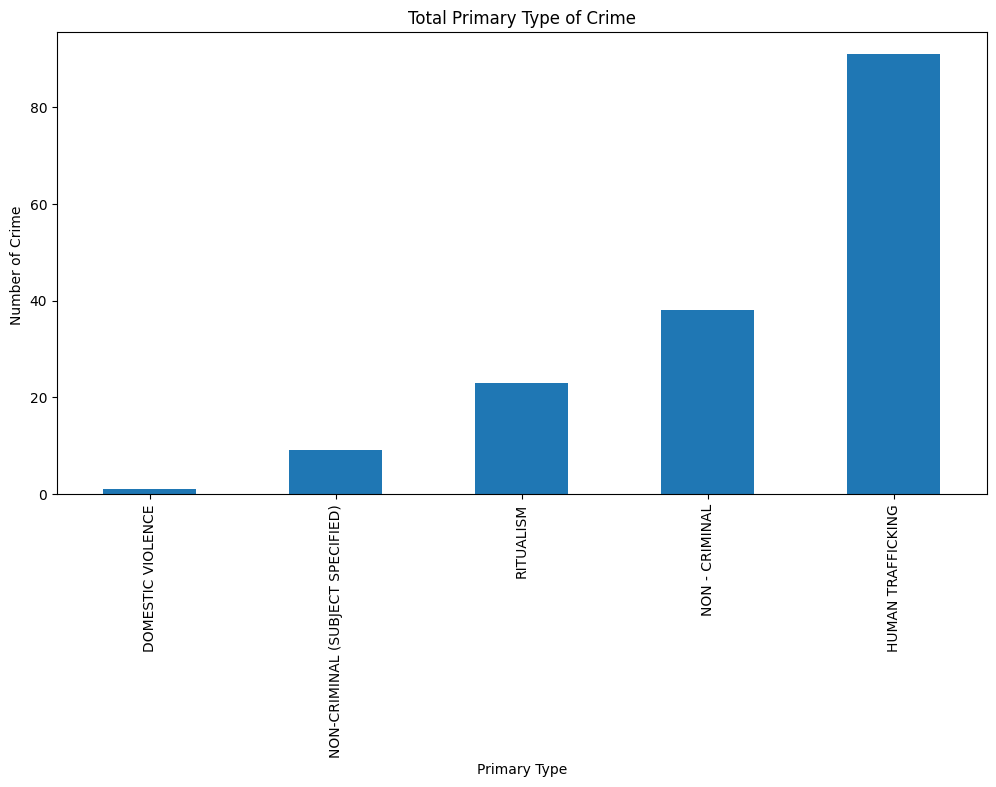

In [73]:
plt.figure(figsize=(12, 6))
plt.title("Total Primary Type of Crime")
plt.xlabel("Type of Crime")
plt.ylabel("Number of Crime ")


df['Primary Type'].value_counts().sort_values().head().plot(kind='bar')